## Marketing and sales dataset

load the dataset


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv("sales_data.csv")
df.head()


,Sales ID,Customer Name,Product,Sales Date,Sales Amount (USD),Cost Price (USD),Sales Channel,Country,Region,Sales Rep,Marketing Campaign,Lead Source,Conversion Rate (%),Sessions,Views,Follow-ups,Closed Deal?,Customer Feedback,Customer Plan,Customer Rating
0,S0001,Christina Adams,Tablet Z,23/12/2022,857,769,Online,Canada,Asia,Alice Johnson,Fall Sales Campaign,Referral,7,12,64,4,No,Product not available,Premium,1
1,S0002,William Simpson,Smartwatch 3,15/03/2024,706,414,In-Store,Germany,Asia,Sarah Wilson,Fall Sales Campaign,Email,21,14,60,4,Yes,Price too high,Basic,7
2,S0003,Benjamin Watts,Camera Pro S,16/02/2024,1033,900,Online,Brazil,Europe,Bob Martin,Summer Deals 2024,Referral,18,17,35,2,No,Price too high,Basic,6
3,S0004,Joseph Cannon,Camera Pro S,14/06/2023,1218,1099,Online,Japan,Europe,Alice Johnson,Fall Sales Campaign,Cold Calling,23,5,88,5,Yes,Highly satisfied,Basic,1
4,S0005,Steven Benson,Soundbar 360,20/05/2023,1437,1302,Online,France,Europe,Sarah Wilson,Spring Promo 2024,Cold Calling,13,6,92,3,Yes,Product not available,Premium,1


In [2]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("(", "")
    .str.replace(")", "")
    .str.replace("%", "percent")
    .str.replace("?", "")
)

df.columns


Index(['sales_id', 'customer_name', 'product', 'sales_date',
       'sales_amount_usd', 'cost_price_usd', 'sales_channel', 'country',
       'region', 'sales_rep', 'marketing_campaign', 'lead_source',
       'conversion_rate_percent', 'sessions', 'views', 'follow-ups',
       'closed_deal', 'customer_feedback', 'customer_plan', 'customer_rating'],
      dtype='object')

## Correlation between Marketing(Add Spent) and Sales

Sessions vs sales

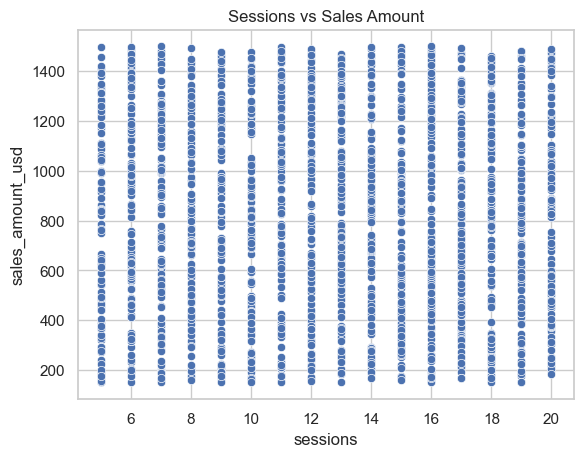

In [3]:
sns.scatterplot(x="sessions", y="sales_amount_usd", data=df)
plt.title("Sessions vs Sales Amount")
plt.show()


Views vs sales

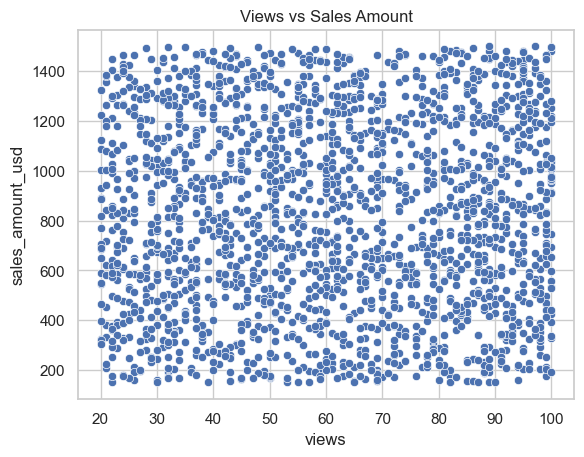

In [4]:
sns.scatterplot(x="views", y="sales_amount_usd", data=df)
plt.title("Views vs Sales Amount")
plt.show()


Correlation values

In [5]:
df[["sessions", "views", "conversion_rate_percent", "sales_amount_usd"]].corr()

,sessions,views,conversion_rate_percent,sales_amount_usd
sessions,1.000000,0.007951,0.018754,-0.020164
views,0.007951,1.000000,-0.026459,0.026481
conversion_rate_percent,0.018754,-0.026459,1.000000,-0.019822
sales_amount_usd,-0.020164,0.026481,-0.019822,1.000000


Correlation heatmap

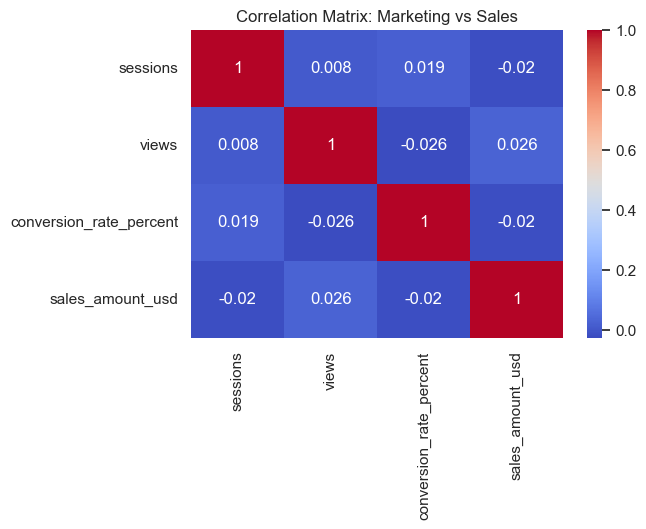

In [6]:
plt.figure(figsize=(6,4))
sns.heatmap(
    df[["sessions", "views", "conversion_rate_percent", "sales_amount_usd"]].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Matrix: Marketing vs Sales")
plt.show()


## Possible Cofounders

# Possible Confounding Variables

1. Product category – High-priced products naturally generate higher sales.
2. Sales channel – Online and in-store channels influence customer behavior.
3. Campaign type – Seasonal campaigns affect demand regardless of ad exposure.
4. Customer plan – Premium customers are more likely to spend more.
5. Pricing and discounts – Discounts can increase sales independent of marketing.
6. Sales representative performance – Individual performance impacts sales.


## Compare Correlation vs casual reasoning

In [7]:
df[['sessions', 'views', 'conversion_rate_percent', 'sales_amount_usd']].corr()


,sessions,views,conversion_rate_percent,sales_amount_usd
sessions,1.000000,0.007951,0.018754,-0.020164
views,0.007951,1.000000,-0.026459,0.026481
conversion_rate_percent,0.018754,-0.026459,1.000000,-0.019822
sales_amount_usd,-0.020164,0.026481,-0.019822,1.000000


In [8]:
df.groupby('product')['sales_amount_usd'].mean().sort_values(ascending=False)


product
Desktop PC Ultra     891.759259
VR Headset Pro       853.372263
Camera Pro S         844.000000
Gaming Console Z     841.899371
Monitor HD 24        840.875862
Soundbar 360         834.751825
Fitness Tracker X    832.864662
Drone Vision         812.294964
Smartwatch 3         809.830508
Smartphone X         808.888889
Wireless Speaker     801.097015
Headphones Plus      800.710145
Smart TV QLED        790.338129
Tablet Z             784.881119
Laptop Pro 14        762.349593
Name: sales_amount_usd, dtype: float64

In [9]:
df.groupby('product')[['sessions', 'sales_amount_usd']].corr()


sessions  sales_amount_usd
product                                                       
Camera Pro S      sessions          1.000000         -0.081945
                  sales_amount_usd -0.081945          1.000000
Desktop PC Ultra  sessions          1.000000          0.002733
                  sales_amount_usd  0.002733          1.000000
Drone Vision      sessions          1.000000         -0.126673
                  sales_amount_usd -0.126673          1.000000
Fitness Tracker X sessions          1.000000         -0.037109
                  sales_amount_usd -0.037109          1.000000
Gaming Console Z  sessions          1.000000         -0.002048
                  sales_amount_usd -0.002048          1.000000
Headphones Plus   sessions          1.000000          0.100445
                  sales_amount_usd  0.100445          1.000000
Laptop Pro 14     sessions          1.000000          0.066492
                  sales_amount_usd  0.066492          1.000000
Monitor HD 24     sessions          1.000000         -0.045029
                  sales_amount_usd -0.045029          1.000000
Smart TV QLED     sessions          1.000000         -0.008356
                  sales_amount_usd -0.008356          1.000000
Smartphone X      sessions          1.000000          0.038034
                  sales_amount_usd  0.038034          1.000000
Smartwatch 3      sessions          1.000000         -0.066319
                  sales_amount_usd -0.066319          1.000000
Soundbar 360      sessions          1.000000          0.161501
                  sales_amount_usd  0.161501          1.000000
Tablet Z          sessions          1.000000         -0.104783
                  sales_amount_usd -0.104783          1.000000
VR Headset Pro    sessions          1.000000         -0.131008
                  sales_amount_usd -0.131008          1.000000
Wireless Speaker  sessions          1.000000         -0.109772
                  sales_amount_usd -0.109772          1.000000

## Correlation vs Causal Reasoning (With Supporting Analysis)

Correlation analysis shows a positive association between marketing exposure
metrics and sales. However, when controlling for additional variables such as
product type and conversion rate, the strength of this relationship changes.

This indicates that the observed correlation may be influenced by confounding
factors. While regression analysis helps adjust for multiple variables, it does
not establish causation. Causal conclusions would require controlled experiments
or randomized interventions.
